In [332]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [333]:
df = pd.read_csv('cleaned_data.csv')
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [334]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'region'],
      dtype='object')

In [335]:
df = df[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region']]

In [336]:
y = df.pop('FWI')
X = df

In [337]:
from sklearn.model_selection import train_test_split

In [338]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

In [339]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(182, 11) (61, 11) (182,) (61,)


In [340]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


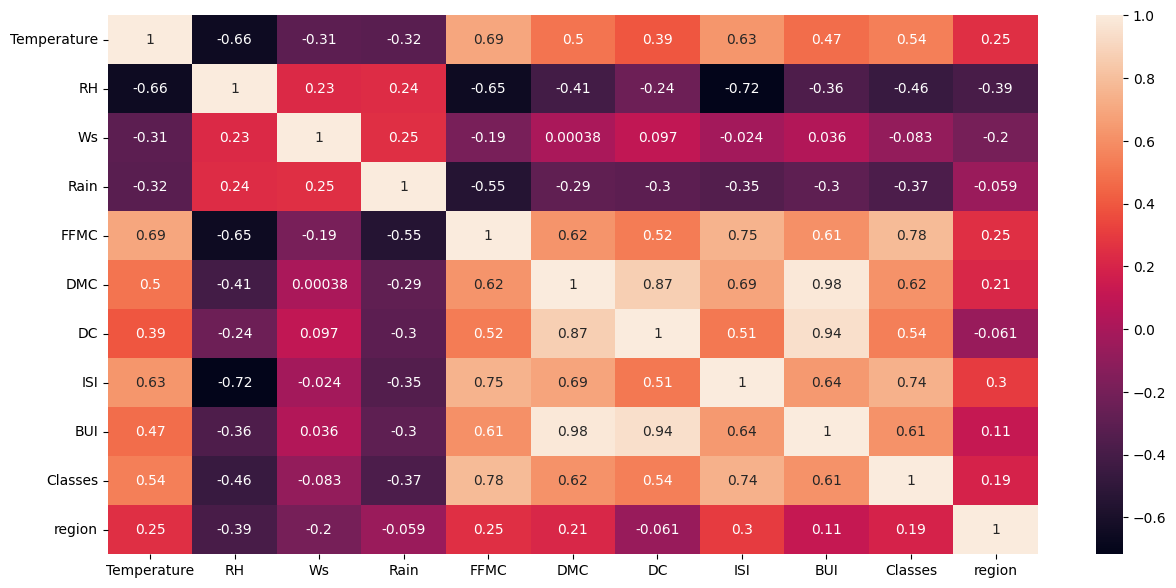

In [341]:
plt.figure(figsize=(15,7))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

In [342]:
np.corrcoef(df.Temperature, df.RH)[0][1]

-0.6514003387092415

In [343]:
corr_features = pd.DataFrame(columns=['f1', 'f2', 'corr_coef'])
for i in X_train.columns:
    for j in X_train.columns:
        if i != j:
            if abs(np.corrcoef(X_train[i],X_train[j])[0][1]) > 0.85:
                new_row = {'f1':i, 'f2':j, 'corr_coef':round(np.corrcoef(X_train[i],X_train[j])[0][1],6)}
                # print(i, j, np.corrcoef(X_train[i],X_train[j])[0][1])
                corr_features = corr_features.append(new_row, ignore_index=True)
corr_features = corr_features.drop_duplicates('corr_coef')
corr_features

,f1,f2,corr_coef
0,DMC,DC,0.868647
1,DMC,BUI,0.983175
3,DC,BUI,0.942414


In [344]:
X_train.drop(columns=['DC','BUI'], inplace=True)
X_test.drop(columns=['DC','BUI'], inplace=True)
X_train.shape ,X_test.shape

((182, 9), (61, 9))

In [345]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [346]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

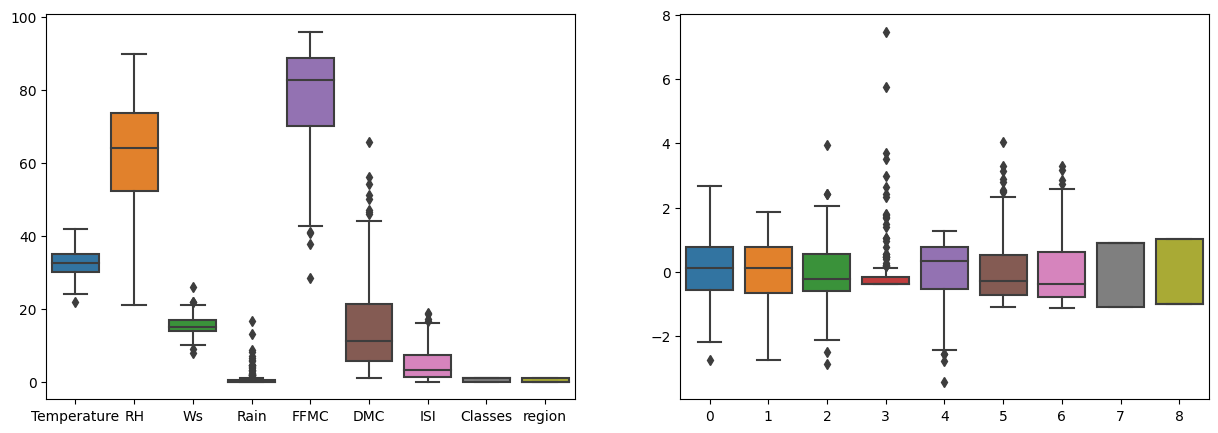

In [347]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.show()

In [348]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [349]:
regression.fit(X_train_scaled,y_train)

LinearRegression()

In [350]:
regression.coef_, regression.intercept_

(array([-0.03634495, -0.17441065,  0.00703214, -0.04108155, -0.82319823,
         3.6982583 ,  4.84057298,  0.40422124, -0.39259928]),
 7.156043956043957)

In [351]:
y_pred = regression.predict(X_test_scaled)

In [352]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),np.sqrt(mean_squared_error(y_test,y_pred))

(0.6742766873791582, 0.546823646524997, 0.8211435242265254)

In [353]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9847657384266951

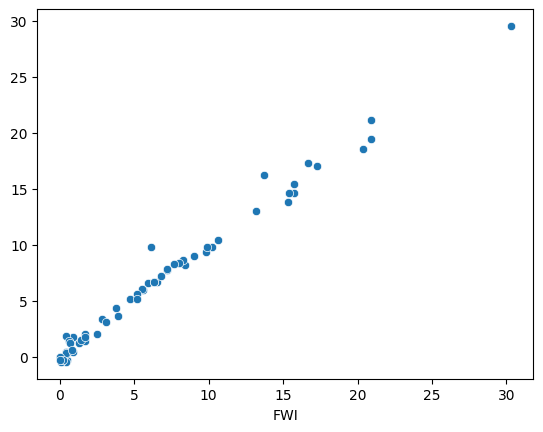

In [354]:
sns.scatterplot(y_test,y_pred)
plt.show()

## Lasso Regression

In [355]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)

y_pred = lasso.predict(X_test_scaled)

In [356]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),np.sqrt(mean_squared_error(y_test,y_pred))

(2.248345891897477, 1.133175994914409, 1.4994485292591662)

In [357]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9492020263112388

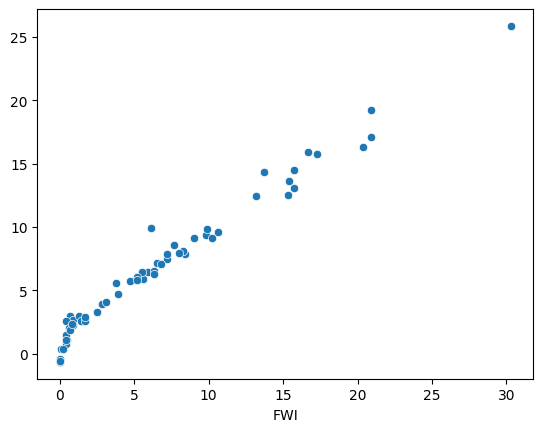

In [358]:
sns.scatterplot(y_test,y_pred)
plt.show()

## Lasso Cross validation

In [359]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled, y_train)

LassoCV(cv=5)

In [360]:
lassocv.alpha_

0.05725391318234405

In [361]:
lassocv.alphas_

array([7.05853002e+00, 6.58280872e+00, 6.13914944e+00, 5.72539132e+00,
       5.33951911e+00, 4.97965339e+00, 4.64404142e+00, 4.33104857e+00,
       4.03915039e+00, 3.76692517e+00, 3.51304702e+00, 3.27627941e+00,
       3.05546914e+00, 2.84954075e+00, 2.65749124e+00, 2.47838523e+00,
       2.31135036e+00, 2.15557308e+00, 2.01029467e+00, 1.87480753e+00,
       1.74845178e+00, 1.63061198e+00, 1.52071419e+00, 1.41822315e+00,
       1.32263965e+00, 1.23349817e+00, 1.15036452e+00, 1.07283380e+00,
       1.00052839e+00, 9.33096128e-01, 8.70208572e-01, 8.11559427e-01,
       7.56863037e-01, 7.05853002e-01, 6.58280872e-01, 6.13914944e-01,
       5.72539132e-01, 5.33951911e-01, 4.97965339e-01, 4.64404142e-01,
       4.33104857e-01, 4.03915039e-01, 3.76692517e-01, 3.51304702e-01,
       3.27627941e-01, 3.05546914e-01, 2.84954075e-01, 2.65749124e-01,
       2.47838523e-01, 2.31135036e-01, 2.15557308e-01, 2.01029467e-01,
       1.87480753e-01, 1.74845178e-01, 1.63061198e-01, 1.52071419e-01,
      

In [362]:
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

In [363]:
y_pred = lassocv.predict(X_test_scaled)

In [364]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),np.sqrt(mean_squared_error(y_test,y_pred))

(0.7924995554743625, 0.6199701158263433, 0.8902244410677357)

In [365]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9820946715928275

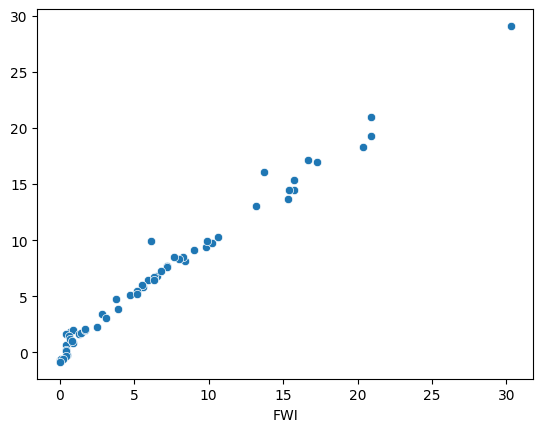

In [366]:
sns.scatterplot(y_test,y_pred)
plt.show()

## Ridge Regression

In [367]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)

y_pred = ridge.predict(X_test_scaled)

In [368]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),np.sqrt(mean_squared_error(y_test,y_pred))

(0.6949198918152082, 0.5642305340105708, 0.8336185529456552)

In [369]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9842993364555513

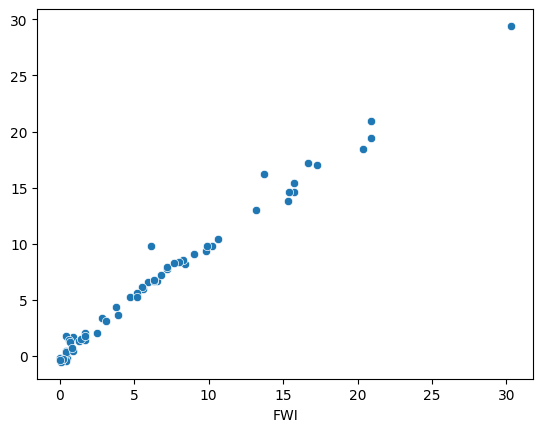

In [370]:
sns.scatterplot(y_test,y_pred)
plt.show()

## Ridge Cross validation

In [371]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled, y_train)

RidgeCV(cv=5)

In [372]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'normalize': 'deprecated',
 'scoring': None,
 'store_cv_values': False}

In [373]:
y_pred = ridgecv.predict(X_test_scaled)

In [374]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),np.sqrt(mean_squared_error(y_test,y_pred))

(0.6949198918152082, 0.5642305340105708, 0.8336185529456552)

In [375]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9842993364555513

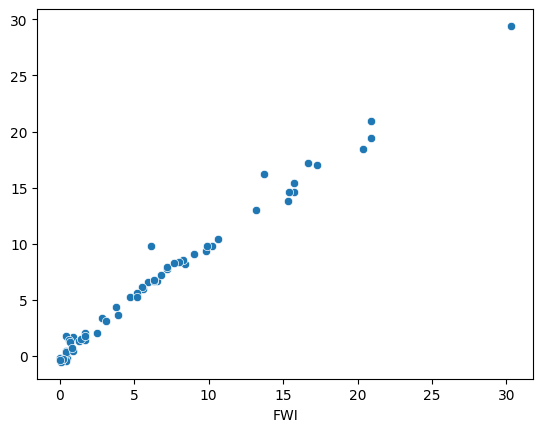

In [376]:
sns.scatterplot(y_test,y_pred)
plt.show()

## Elasticnet Regression

In [377]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet()
elasticnet.fit(X_train_scaled,y_train)

y_pred = elasticnet.predict(X_test_scaled)

In [378]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),np.sqrt(mean_squared_error(y_test,y_pred))

(5.517251101025224, 1.8822353634896, 2.3488829474933874)

In [379]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8753460589519703

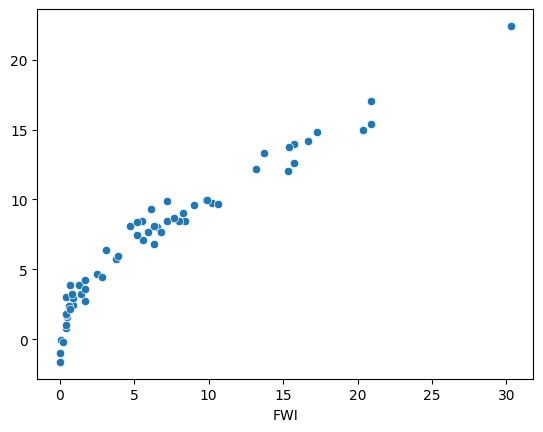

In [380]:
sns.scatterplot(y_test,y_pred)
plt.show()

## Elasticnet Cross validation

In [381]:
from sklearn.linear_model import ElasticNetCV
elasticnetcv = ElasticNetCV(cv=5)
elasticnetcv.fit(X_train_scaled, y_train)

ElasticNetCV(cv=5)

In [382]:
elasticnetcv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}

In [383]:
y_pred = elasticnetcv.predict(X_test_scaled)

In [384]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),np.sqrt(mean_squared_error(y_test,y_pred))

(0.8222830416276264, 0.6575946731430901, 0.9067982364493363)

In [385]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9814217587854941

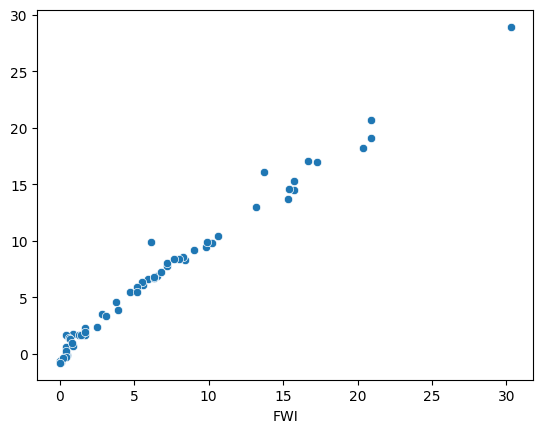

In [386]:
sns.scatterplot(y_test,y_pred)
plt.show()

In [387]:
scaler

StandardScaler()

In [388]:
ridge

Ridge()

In [389]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))